Q1.Dataset: Energy Efficiency Dataset (https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)
The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption.
Your objective is to predict the Heating Load of a building based on its physical attributes and architectural design.
(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
import pandas as pd
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('https://archive.ics.uci.edu/ml/datasets/Energy+efficiency')
import seaborn as sns


print(data.head())

print(data.isnull().sum())
# Summary statistics
print(data.describe())

ModuleNotFoundError: No module named 'numpy'

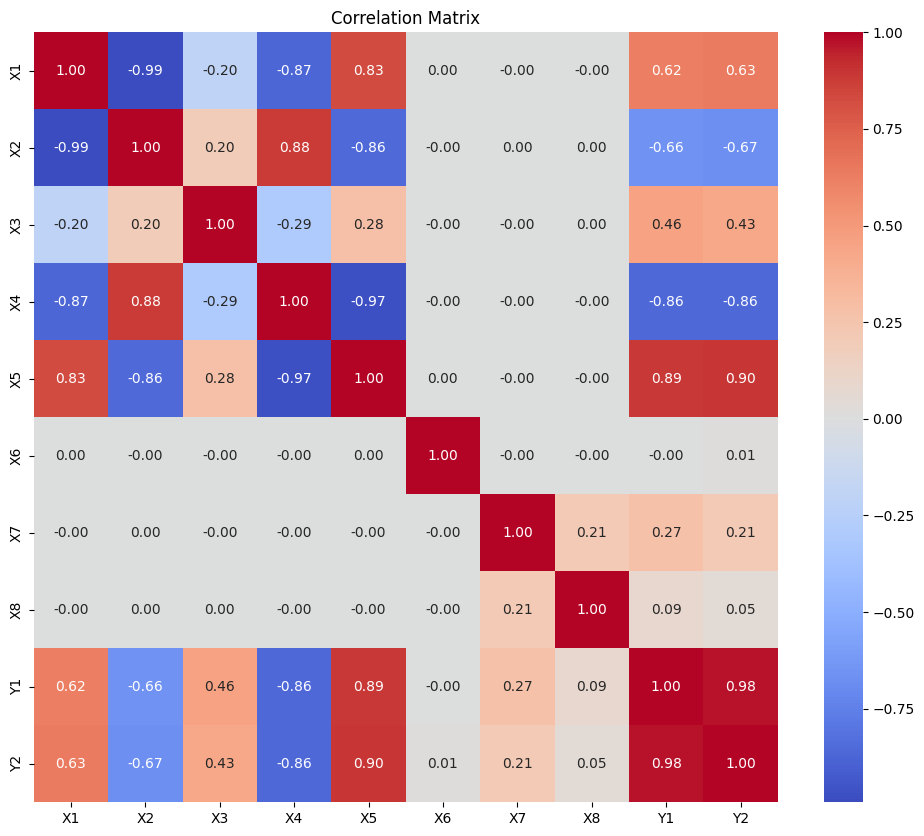

Y1    1.000000
Y2    0.975862
X5    0.889431
X1    0.622272
X3    0.455671
X7    0.269841
X8    0.087368
X6   -0.002587
X2   -0.658120
X4   -0.861828
Name: Y1, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


correlated_features = correlation_matrix['Y1'].sort_values(ascending=False)
print(correlated_features)


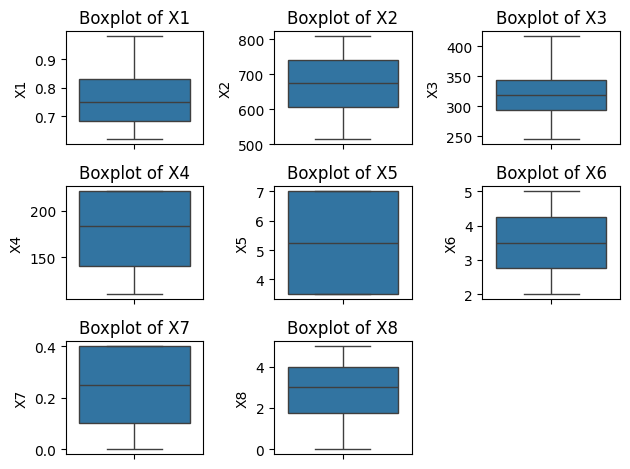

In [ ]:
# Plot boxplots
plt.figure()
for i, column in enumerate(data.columns[:-2], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [ ]:

numerical_columns = data.columns[:-2]
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

data_cleaned = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data shape after outlier removal:", data_cleaned.shape)


Data shape after outlier removal: (768, 10)


(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.


In [ ]:
X = data_cleaned.iloc[:, :-2]
y = data_cleaned['Y1']  
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

Training data shape: (614, 8)
Testing data shape: (154, 8)


(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset


In [ ]:
import numpy as np

X_train_manual = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_manual = np.c_[np.ones(X_test.shape[0]), X_test]

def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

theta_manual = normal_equation(X_train_manual, y_train)


y_pred_manual = X_test_manual @ theta_manual


In [ ]:


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred_sklearn = linear_model.predict(X_test)


In [ ]:


# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


 Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.


Manual Linear Regression: (0.15310289144173161, 88.27339810842886, np.float64(9.395392387145353))
Sklearn Linear Regression: (0.9121840951546909, 9.153187855202761, np.float64(3.025423582773619))
Ridge Regression: (0.9116022996511594, 9.213829302176606, np.float64(3.035429014517817))
Lasso Regression: (0.904647423874839, 9.938746782699038, np.float64(3.152577799626686))


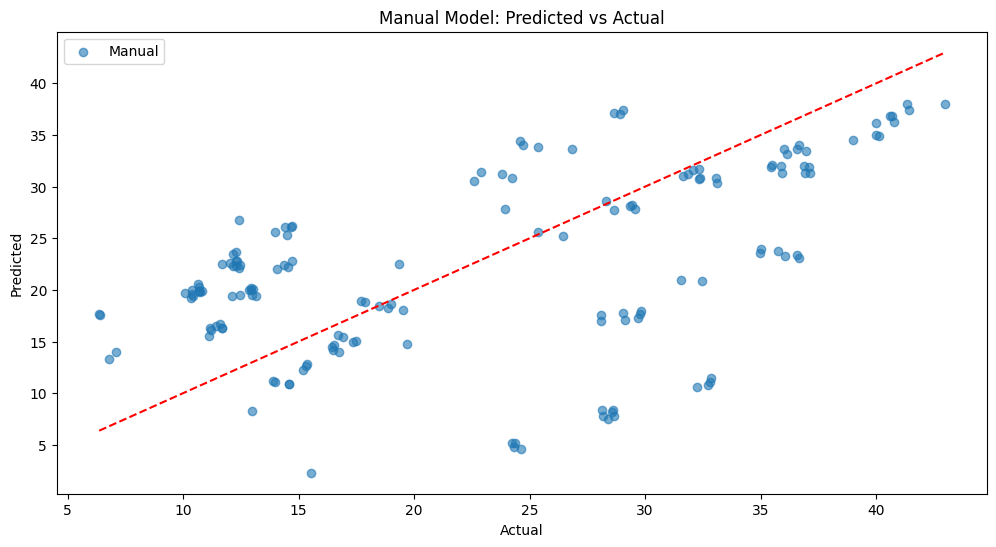

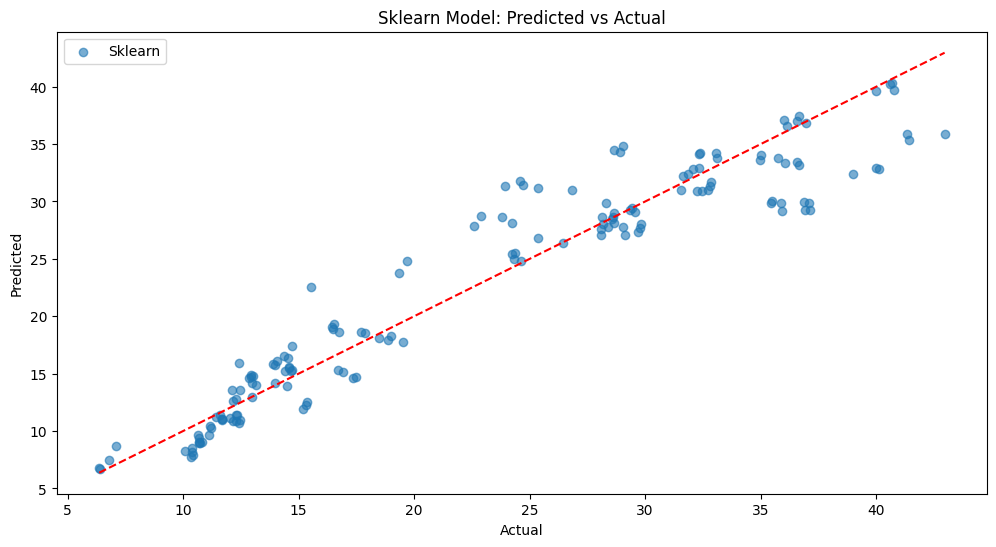

In [ ]:

def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse


manual_metrics = evaluate(y_test, y_pred_manual)
sklearn_metrics = evaluate(y_test, y_pred_sklearn)
ridge_metrics = evaluate(y_test, y_pred_ridge)
lasso_metrics = evaluate(y_test, y_pred_lasso)


print("Manual Linear Regression:", manual_metrics)
print("Sklearn Linear Regression:", sklearn_metrics)
print("Ridge Regression:", ridge_metrics)
print("Lasso Regression:", lasso_metrics)
# Plot predicted vs actual for manual model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_manual, alpha=0.6, label='Manual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Manual Model: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Repeat for sklearn model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_sklearn, alpha=0.6, label='Sklearn')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Sklearn Model: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



Enhance wall and roof insulation to reduce heating demands.
Use energy-efficient glazing to minimize heat loss effectively.
Orient the building strategically to harness passive solar heating.
Adopt a compact design to reduce the surface area-to-volume ratio, limiting heat dissipation.